# Assignment 3 - Supervised Learning

## *Ana Belen Barcenas Jimenez*
Netid:  *ab713*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) Likelihood function:

$$L(x_i;w) = \prod_{i=1}^{n}p(x_i)^{y_{i}}(1-p(x_i))^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_{i}}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}^{y_{i}}\Big(1-\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}\Big)^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}^{y_{i}}\Big(1-\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Big)^{1-y_{i}}$$



(b) Cost function = negative of the log-likelihood:

$$C(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^{n}\Big[y_{i} log\big(\sigma(\mathbf{w}^T \mathbf{x}_i)\big) + (1-y_{i})log\big(1-\big(\sigma(\mathbf{w}^T \mathbf{x}_i)\big)\big)\Big]$$

$$C(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^{n}\Bigg[y_{i} log \Bigg(\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Bigg) + (1-y_{i})log\Bigg(1-log \Bigg(\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Bigg)\Bigg)\Bigg]$$

$$C(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}\big[(1-y_{i})(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}) + log\big(1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}\big)$$

(c)

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$$

First, I will take the derivative for a single w:

$$ \frac{\partial{C}}{\partial \mathbf{w}} = \Bigg[(1-y_{i})-\frac{e^{-wx}}{1-e^{-wx}}\Bigg]x = \Big[\frac{1}{1-e^{-wx}}-y_i\Big]x$$

Now, the partial derivative with respect of each parameter will be:

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right] $$

$$ = \Bigg[\Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_0, \Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_1, \Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_2 \Bigg]$$

(d)

$$ w_{i}^{new} = w_{i}^{old} + \eta\bigg( \frac{\partial LL(w_{i}^{old})}{\partial w_i^{old}}\bigg)$$  Where $LL$ is the Log-likelihood function.

$$= w_{i}^{old} + \eta\bigg[ \sum_{i=1}^{n}y_{i} - \sigma\big(\mathbf{w}^T \mathbf{x}_i \big)\bigg]$$


(e)

In [239]:
import numpy as np
import pandas as pd

data1 = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/A3_Q1_data.csv')
data1.groupby('y').count()

,x1,x2
y,,
0.0,50000,50000
1.0,50000,50000


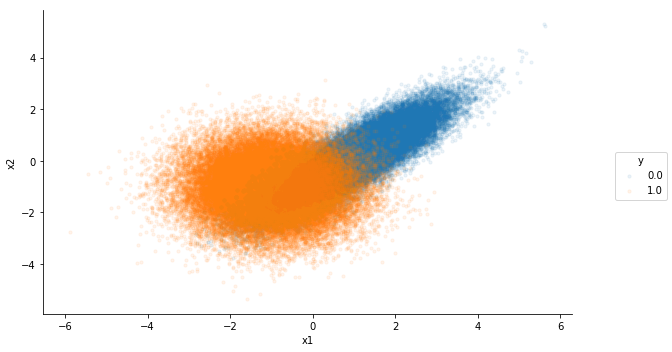

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('x1', 'x2', data1, hue='y', fit_reg=False, scatter_kws={"alpha":0.08,"s":10})
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

The dataset is perfectly balanced between the binary outcome $y=1$ and $y=0$. However, there is some overlap between the categories that makes difficult to classify those overlapping observations correctly. Logistic regression could a good option to classify those datapoints as long as we were willing to missclassify one of the category for the sake of classifying better the other category.

(f)

In [241]:
data1.isnull().values.any()

False

In [242]:
data1.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


There are no missing values in the data and seems unnecessary to apply scale differences.

(g)

In [291]:
# Let's define some arrays and variables that are going to be used:
w = np.array([1,1,1]) # example weights array
X = np.array(data1)[:,0:2] # regressors array
ones = np.ones((X.shape[0], 1)) # adding a ones column 
X_ = np.hstack((ones, X)) # regressors with ones array


def sigmoid(w,X_):
    return 1 / (1 + np.exp(-(np.dot(X_,w))))
# Test sigmoid function
h = sigmoid(w,X_)
h

array([0.97998158, 0.54190968, 0.61409254, ..., 0.83636803, 0.95946568,
       0.03769867])

(h)

In [292]:
# Let's reshape the dependent variable as an array
y = np.array(data1['y']).reshape(1,-1)

def cost(w,y,X_):
    h = sigmoid(w,X_)
    N = X_.shape[0] # total number of observations
    return 1/N * np.sum((-y * np.log(h) - (1 - y) * np.log(1 - h)))

c = cost(w,y,X_)
c

2.036273608943672

(i) 

In [293]:
# Divide data into training and test and formatting

data1_ = np.array(data1)

train = data1.sample(frac=0.7,random_state=200)
test = data1.drop(train.index)

train_x = np.array(train[['x1','x2']])
train_y = np.array(train['y']).reshape(1,-1)

test_x = np.array(test[['x1','x2']])
test_y = np.array(test['y']).reshape(1,-1)

print(train.shape)
print(test.shape)

(70000, 3)
(30000, 3)


In [294]:
# Calculating the transpose and adding row of 
# ones for future calculations
ones = np.ones((train_x.shape[0], 1)) # adding a ones column 
train_x_ = np.hstack((ones, train_x))

ones = np.ones((test_x.shape[0], 1)) # adding a ones column 
test_x_ = np.hstack((ones, test_x))
test_x_.shape

(30000, 3)

In [295]:
# Gradient descent function 
def gradientd(w, X_, y, eta):
    parameters = []
    w_old = w
    w_new = w
    dst = 1
    sig = 0
    eta = 0.25 # Learning rate
    
    while dst > 1e-6:
        w_old = w_new
        sig = sigmoid(w_old,X_)
        gradient = np.dot((sig-y),X_.T)/X_.shape[1]
        w_new = w_old - eta * gradient
        dst = np.linalg.norm(w_new - w_old)
        parameters.append(w_new)
        pass
    return parameters

(j)

In [296]:
# function to print out cost function for each w estimate
def parameters_cost(parameters, X_, y):
    iteration = 0
    costs = []
    for each in parameters:
        costs.append(cost(X_.shape[1], y, sigmoid(each, X_)))
        
    return costs

(k)

In [297]:
# Training dataset: eta = 0.25

eta_25 = gradientd(train_x_, w, train_y, 0.25)


ValueError: shapes (3,) and (70000,3) not aligned: 3 (dim 0) != 70000 (dim 0)

References:

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**